In [282]:
import pandas as pd

In [283]:
# Cargar datos
csv_path = "../../data/processed/btc_gold.csv"
btc = pd.read_csv(csv_path)

In [284]:
btc['Date'] = pd.to_datetime(btc['Date'])

In [285]:
btc.set_index('Date', inplace=True)

In [286]:
btc.head()

,Close,Open,log_return,delta_close,close_lag1,close_lag2,close_lag3,sma_7,sma_14,ema_14,...,rolling_std_14,bollinger_width,volume_log,volume_sma_5,obv,day_of_week,is_month_end,trend_sequence,month,target
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-28,33466.097656,30441.041016,0.095020,3033.550781,30432.546875,32569.849609,32366.392578,32313.952846,34459.100865,33591.160848,...,2463.028807,27.550736,25.060781,6.157805e+10,235792521820,3,0,33,1,1
2021-01-29,34316.386719,34318.671875,0.025090,850.289062,33466.097656,30432.546875,32569.849609,32501.184989,34111.176479,33687.857630,...,2053.779943,23.207313,25.493057,7.542819e+10,353687094331,4,0,34,1,0
2021-01-30,34269.523438,34295.933594,-0.001367,-46.863281,34316.386719,33466.097656,30432.546875,32815.739397,33928.616211,33765.413071,...,1901.938359,21.607173,24.899833,7.647715e+10,288545265533,5,0,35,1,0
2021-01-31,33114.359375,34270.878906,-0.034289,-1155.164062,34269.523438,34316.386719,33466.097656,32933.593750,33709.774693,33678.605912,...,1796.534599,20.542220,24.688916,7.497697e+10,235790722862,6,1,36,1,1
2021-02-01,33537.175781,33114.578125,0.012688,422.816406,33114.359375,34269.523438,34316.386719,33100.848493,33548.767439,33659.748561,...,1693.702947,19.459350,24.840682,7.474170e+10,297191123522,0,0,37,2,1


In [287]:
btc.tail()

,Close,Open,log_return,delta_close,close_lag1,close_lag2,close_lag3,sma_7,sma_14,ema_14,...,rolling_std_14,bollinger_width,volume_log,volume_sma_5,obv,day_of_week,is_month_end,trend_sequence,month,target
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-27,87177.101562,86896.257812,0.003174,276.218750,86900.882812,87471.703125,87498.914062,86139.814732,85120.443638,85781.479940,...,1785.359070,8.084615,23.918401,2.566012e+10,-561404247296,3,0,1545,3,0
2025-03-28,84353.148438,87185.234375,-0.032930,-2823.953125,87177.101562,86900.882812,87471.703125,86184.087054,85147.875558,85591.035740,...,1769.185152,8.008794,24.255451,2.998092e+10,-595602866805,4,0,1546,3,0
2025-03-29,82597.585938,84352.070312,-0.021032,-1755.562500,84353.148438,87177.101562,86900.882812,86007.672991,85023.195312,85191.909100,...,1887.792883,8.558242,23.554677,2.645827e+10,-612572262940,5,0,1547,3,0
2025-03-30,82334.523438,82596.984375,-0.003190,-263.062500,82597.585938,84353.148438,87177.101562,85476.265625,85005.683594,84810.924345,...,1913.169709,8.675074,23.415441,2.340986e+10,-627336023883,6,0,1548,3,1
2025-03-31,82548.914062,82336.062500,0.002601,214.390625,82334.523438,82597.585938,84353.148438,84769.122768,84896.628348,84509.322974,...,2011.259833,9.131569,24.090707,2.386990e+10,-598331795636,0,1,1549,3,0


Dividir los datos en entrenamiento, validación y test

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
# 1. Crear X e y
X = btc.drop(columns='target')
y = btc['target']

In [290]:
# 2. Definir fechas para splits
train_end = "2025-01-31"
val_start = "2025-02-01"
val_end = "2025-02-28"
test_start = "2025-03-01"
test_end = "2025-04-01"  # Último día disponible en tus datos

In [291]:
# 3. Separar por fechas
X_train = X[X.index <= train_end]
y_train = y.loc[X_train.index]

X_val = X[(X.index >= val_start) & (X.index <= val_end)]
y_val = y.loc[X_val.index]

X_test = X[(X.index >= test_start) & (X.index <= test_end)]
y_test = y.loc[X_test.index]

In [292]:

# 4. Verificar tamaños
print(f"✅ Train: {X_train.shape}")
print(f"✅ Val  : {X_val.shape}")
print(f"✅ Test : {X_test.shape}")

✅ Train: (1458, 27)
✅ Val  : (28, 27)
✅ Test : (31, 27)


Feature Selection con SelectKBest

In [293]:
from sklearn.feature_selection import SelectKBest, f_classif

In [294]:
# Selección de K mejores features
selector = SelectKBest(score_func=f_classif, k=20)
X_train_kbest = selector.fit_transform(X_train, y_train)

In [295]:
# Aplicar transformación a val/test
X_val_kbest = selector.transform(X_val)
X_test_kbest = selector.transform(X_test)

In [296]:
# Nombres de las columnas seleccionadas
selected_features = X_train.columns[selector.get_support()]
print("✅ Features seleccionadas:", list(selected_features))

✅ Features seleccionadas: ['Open', 'log_return', 'delta_close', 'close_lag1', 'close_lag2', 'sma_7', 'sma_14', 'ema_14', 'sma_diff', 'ema_ratio', 'close_minus_sma14', 'close_minus_ema14', 'rsi_14', 'roc_12', 'rolling_std_14', 'bollinger_width', 'volume_log', 'obv', 'is_month_end', 'trend_sequence']


Ahora si vamos a comenzar con los Modelos

1. Comenzamos con el árbol de desición

In [297]:
from sklearn.tree import DecisionTreeClassifier

In [298]:
# 1. Instanciar modelo
dt_model = DecisionTreeClassifier(random_state=42)

In [299]:
# 2. Entrenar
dt_model.fit(X_train_kbest, y_train)

DecisionTreeClassifier(random_state=42)

In [300]:
# 3. Predecir
y_pred = dt_model.predict(X_test_kbest)

In [301]:
# 4. Evaluar
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, log_loss, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
def evaluate_model(model, X_test, y_test):
    # Predicciones
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Métricas de clasificación
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    logloss = log_loss(y_test, y_proba) if y_proba is not None else None
    r2 = r2_score(y_test, y_proba) if y_proba is not None else None

    print("📊 Evaluación del modelo")
    print(f"✅ Accuracy      : {acc:.4f}")
    print(f"🎯 Precision     : {prec:.4f}")
    print(f"🔁 Recall        : {rec:.4f}")
    print(f"📏 F1-score      : {f1:.4f}")
    if auc is not None:
        print(f"📈 ROC AUC       : {auc:.4f}")
    if logloss is not None:
        print(f"🧮 Log Loss      : {logloss:.4f}")
    if r2 is not None:
        print(f"📐 R² Score      : {r2:.4f}")
    print("\n📄 Reporte completo:\n")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred: 0', 'Pred: 1'],
                yticklabels=['Real: 0', 'Real: 1'])
    plt.title("🔍 Matriz de Confusión")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.tight_layout()
    plt.show()

In [ ]:

def simulate_trading(y_test, y_proba, threshold_buy=0.55, threshold_sell=0.45, initial_balance=1000):
    df = pd.DataFrame({'y_true': y_test, 'y_proba': y_proba})
    df['signal'] = df['y_proba'].apply(lambda p: 1 if p > threshold_buy else (-1 if p < threshold_sell else 0))
    risk_level = 2 # Nivel de riesgo (1-5)
    df['return'] = df['y_true'].shift(-1).fillna(0) * df['signal'] * risk_level
    df['strategy'] = df['return'].cumsum()
    df['equity'] = initial_balance + df['strategy']

    # Sharpe ratio (suponiendo retorno diario y tasa libre de riesgo = 0)
    daily_returns = df['return']
    sharpe = np.mean(daily_returns) / np.std(daily_returns) * np.sqrt(252) if np.std(daily_returns) > 0 else 0

    # Max drawdown
    rolling_max = df['equity'].cummax()
    drawdown = df['equity'] / rolling_max - 1
    max_drawdown = drawdown.min()

    # Win rate
    wins = (df['return'] > 0).sum()
    total_trades = (df['signal'] != 0).sum()
    win_rate = wins / total_trades if total_trades > 0 else 0

    # Plot equity curve
    plt.figure(figsize=(10, 4))
    plt.plot(df['equity'], label='Equity Curve')
    plt.title("📈 Simulación de Trading")
    plt.xlabel("Día")
    plt.ylabel("Balance")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"💰 Retorno Acumulado : {df['strategy'].iloc[-1]:.2f}")
    print(f"📈 Sharpe Ratio      : {sharpe:.4f}")
    print(f"📉 Max Drawdown      : {max_drawdown:.4f}")
    print(f"✅ Win Rate          : {win_rate:.2%}")

    return df[['y_true', 'y_proba', 'signal', 'return', 'equity']]


📊 Evaluación del modelo
✅ Accuracy      : 0.4194
🎯 Precision     : 0.3333
🔁 Recall        : 0.3846
📏 F1-score      : 0.3571
📈 ROC AUC       : 0.4145
🧮 Log Loss      : 20.9286
📐 R² Score      : -1.3846

📄 Reporte completo:

              precision    recall  f1-score   support

           0       0.50      0.44      0.47        18
           1       0.33      0.38      0.36        13

    accuracy                           0.42        31
   macro avg       0.42      0.41      0.41        31
weighted avg       0.43      0.42      0.42        31



/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_4543/2932919947.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


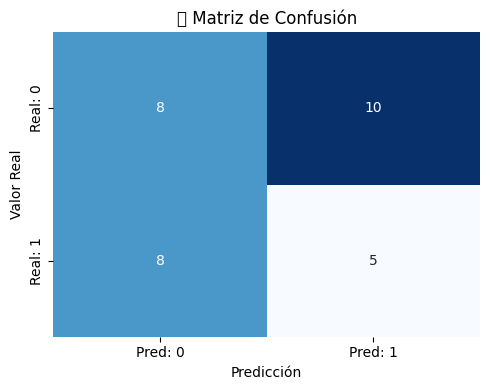

In [304]:
evaluate_model(dt_model, X_test_kbest, y_test)

/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_4543/2746662135.py:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


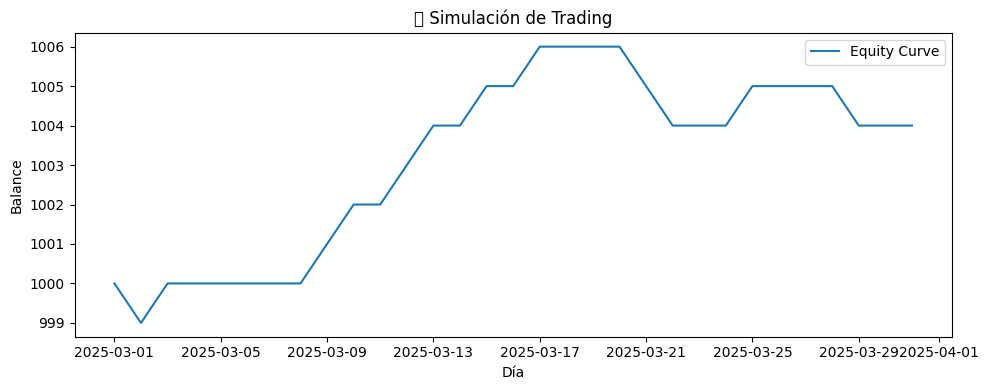

💰 Retorno Acumulado : 4.00
📈 Sharpe Ratio      : 3.3654
📉 Max Drawdown      : -0.0020
✅ Win Rate          : 25.81%


,y_true,y_proba,signal,return,equity
Date,,,,,
2025-03-01,1,1.0,1,0.0,1000.0
2025-03-02,0,0.0,-1,-1.0,999.0
2025-03-03,1,1.0,1,1.0,1000.0
2025-03-04,1,0.0,-1,-0.0,1000.0
2025-03-05,0,1.0,1,0.0,1000.0
2025-03-06,0,1.0,1,0.0,1000.0
2025-03-07,0,1.0,1,0.0,1000.0
2025-03-08,0,0.0,-1,-0.0,1000.0
2025-03-09,0,1.0,1,1.0,1001.0


In [305]:
y_proba = dt_model.predict_proba(X_test_kbest)[:, 1]
simulate_trading(y_test, y_proba)

Usa GridSearchCV para probar varias combinaciones

In [306]:
from sklearn.model_selection import GridSearchCV

In [307]:
# 1. Definir el grid de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# 2. Instanciar el modelo base
base_tree = DecisionTreeClassifier(random_state=42)

# 3. Grid search con validación cruzada
grid_search = GridSearchCV(
    estimator=base_tree,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [308]:
# 4. Ajustar con el set de entrenamiento
grid_search.fit(X_train_kbest, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 5, 10],
                         'min_samples_split': [2, 4, 5, 10]},
             scoring='accuracy', verbose=1)

In [309]:
# 5. Resultado
print("✅ Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

✅ Mejor combinación de hiperparámetros:
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [310]:
# 6. Modelo optimizado
best_tree = grid_search.best_estimator_

📊 Evaluación del modelo
✅ Accuracy      : 0.5806
🎯 Precision     : 0.5000
🔁 Recall        : 0.1538
📏 F1-score      : 0.2353
📈 ROC AUC       : 0.6026
🧮 Log Loss      : 1.7455
📐 R² Score      : 0.0035

📄 Reporte completo:

              precision    recall  f1-score   support

           0       0.59      0.89      0.71        18
           1       0.50      0.15      0.24        13

    accuracy                           0.58        31
   macro avg       0.55      0.52      0.47        31
weighted avg       0.55      0.58      0.51        31



/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_4543/2932919947.py:38: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


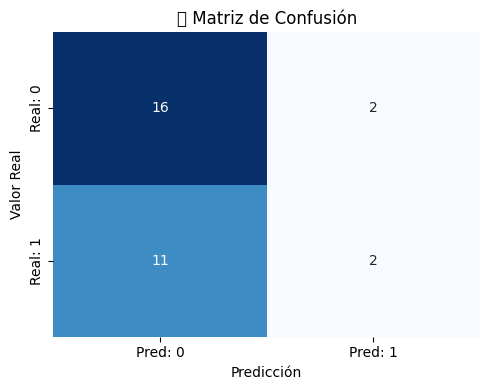

In [311]:
evaluate_model(best_tree, X_test_kbest, y_test)

/var/folders/1p/fq1m75_x51v5l3dmf0wxswbr0000gn/T/ipykernel_4543/2746662135.py:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/titusr09/Library/CloudStorage/OneDrive-UniversidadSanFranciscodeQuito/USFQ/2024-2025/Octavo Semestre 2025/Data Mining/pset#3/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


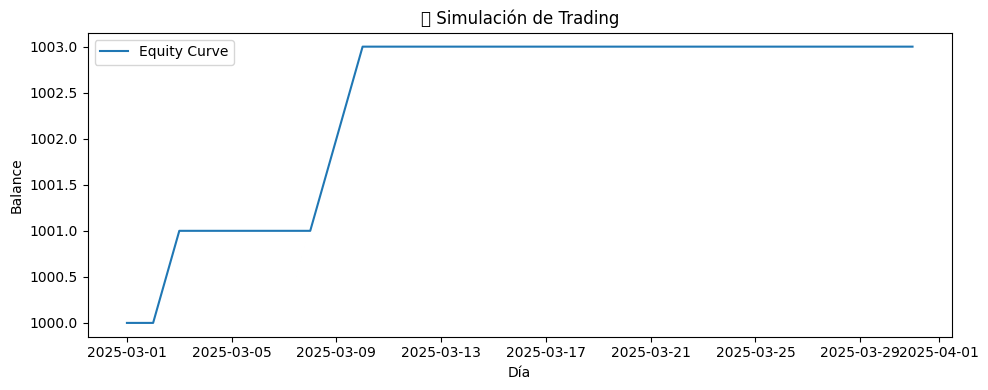

💰 Retorno Acumulado : 3.00
📈 Sharpe Ratio      : 5.1962
📉 Max Drawdown      : 0.0000
✅ Win Rate          : 60.00%


,y_true,y_proba,signal,return,equity
Date,,,,,
2025-03-01,1,0.491898,0,0.0,1000.0
2025-03-02,0,0.491898,0,0.0,1000.0
2025-03-03,1,1.000000,1,1.0,1001.0
2025-03-04,1,0.491898,0,0.0,1001.0
2025-03-05,0,0.491898,0,0.0,1001.0
2025-03-06,0,0.491898,0,0.0,1001.0
2025-03-07,0,0.550000,0,0.0,1001.0
2025-03-08,0,0.491898,0,0.0,1001.0
2025-03-09,0,1.000000,1,1.0,1002.0


In [312]:
y_proba = best_tree.predict_proba(X_test_kbest)[:, 1]
simulate_trading(y_test, y_proba)